In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from bing_helper import load_json_files, get_hits_from_json, load_lang_news_hits
from regression import fit_regression_and_rename_coeffs_by_cat, fit_regression_and_rename_coeffs, write_reg_results
from processing import filter_by_region_cat_code, build_regression_dataframe, load_preprocessed_events
from plot_regression import plot_regression_results, plot_regression_results_interactions, plot_country_counts, plot_regression_results_interactions_from_dict, plot_cat_by_cat_variable
from preprocessing import load_if_in_country_or_lang

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## load Data


In [9]:
df_crawled = load_preprocessed_events()
df_crawled = load_if_in_country_or_lang(df_crawled)
data = build_regression_dataframe(df_crawled)
df_crawled.head()

/home/ruptho/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/ruptho/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


,event_id,pagetitle,event_date,economic_region,country,continent,cat,categories,views_7_sum,views_before_mean,...,population,Country/Area,Year,GDP_pc,GDP,oecd,date_month,views_baseline,in_code_lang,in_code_region
0,Q100021,Pakistan International Airlines Flight 661,2016-12-07,Global South,Pakistan,Asia,disaster,"['Category:2016 disasters in Pakistan', 'Categ...",248274,0.000000,...,203631356,Pakistan,2016,1362.860008,2.775210e+11,False,2016-12-01,8.684000e+07,True,False
1,Q100231328,Gretchen Whitmer kidnapping plot,2020-10-08,Global North,United States,North America,disaster,"['Category:2020 crimes in the United States', ...",74144,0.000000,...,329484123,United States,2020,63122.594145,2.089375e+13,True,2020-10-01,3.137752e+09,True,True
2,Q100256872,Killing of Babu Lal Vaishnav,2020-10-08,Global South,India,Asia,disaster,"['Category:2020 crimes in India', 'Category:20...",427,0.000000,...,1380004385,India,2020,1930.971218,2.664749e+12,False,2020-10-01,7.142770e+08,True,False
3,Q100279235,Miss Vietnam 2020,2020-11-20,Global South,Vietnam,Asia,culture,"['Category:2020 beauty pageants', 'Category:Be...",1444,49.285714,...,97338583,Vietnam,2020,2785.724225,2.711584e+11,False,2020-11-01,1.619000e+07,False,False
4,Q100288161,2020 Ganja missile attacks,2020-10-11,Global South,Azerbaijan,Asia,disaster,"['Category:2020 in Azerbaijan', 'Category:Arti...",7410,0.000000,...,10093121,Azerbaijan,2020,4202.232239,4.260718e+10,False,2020-10-01,3.088000e+06,False,False


# Analyze Outliers

# From Regression:

In [11]:
from plot_regression import plot_cat_by_cat

In [10]:
df_filtered = df_crawled[(df_crawled.cat != 'undefined') & (df_crawled.views_7_sum > np.log1p(10))]

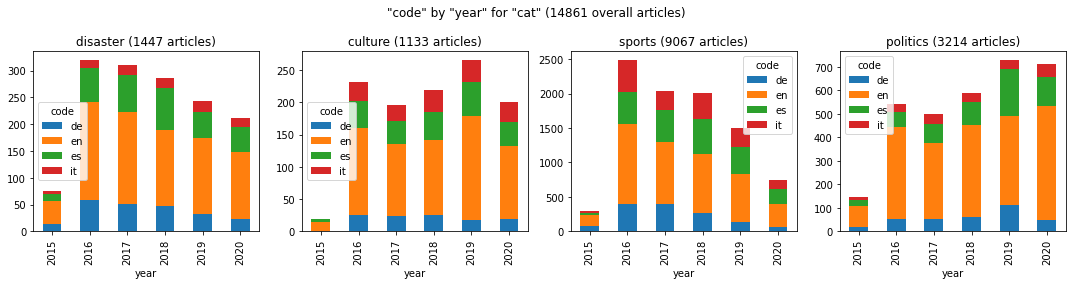

In [87]:
plot_cat_by_cat_variable(df_filtered, 'code', 'year', 'cat', stacked=True, sharey=False)

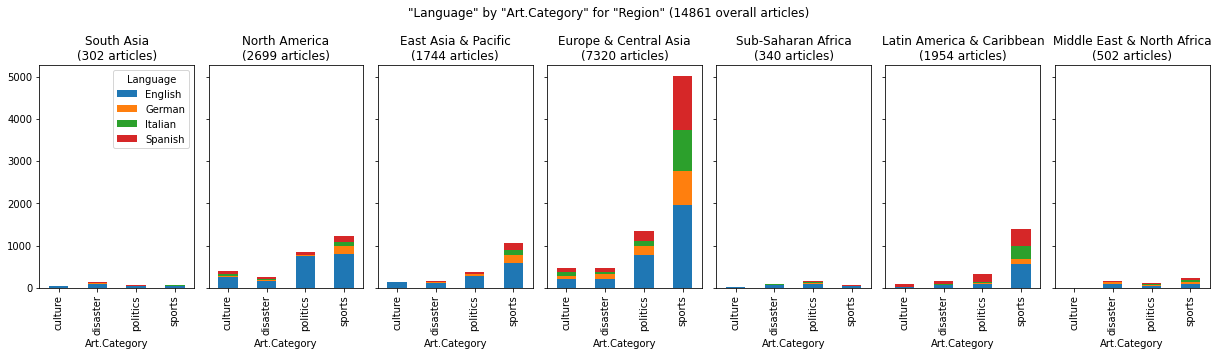

In [161]:
plot_cat_by_cat_variable(df_filtered, 'code', 'cat', 'gni_region', stacked=True, sharey=True, figsize=(17,5))

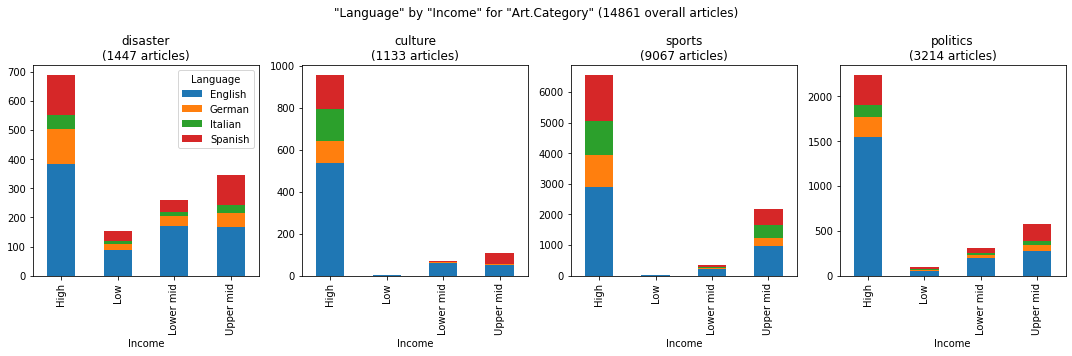

In [160]:
plot_cat_by_cat_variable(df_filtered, 'code', 'gni_class', 'cat', stacked=True, sharey=False, figsize=(15,5))

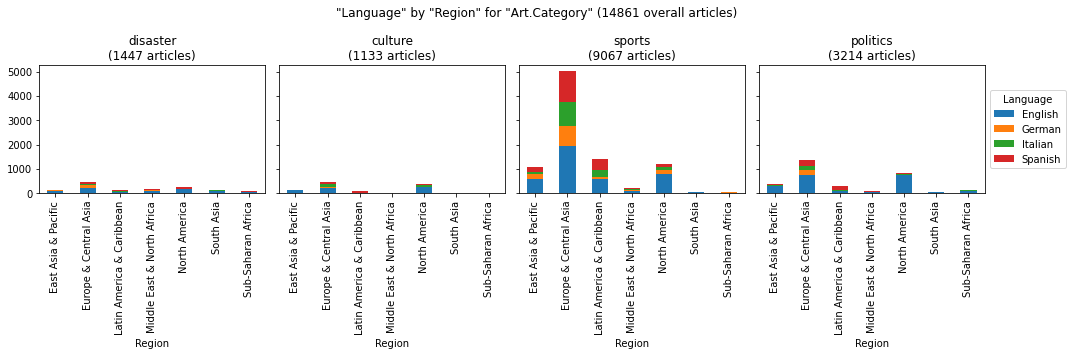

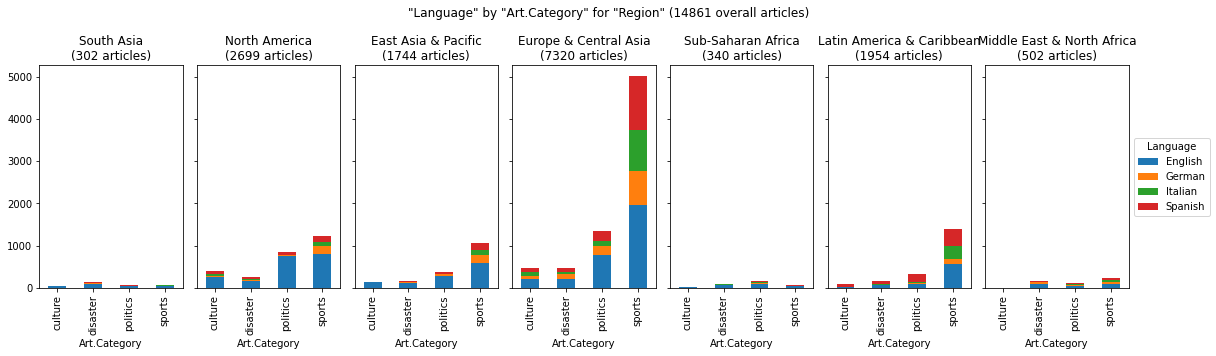

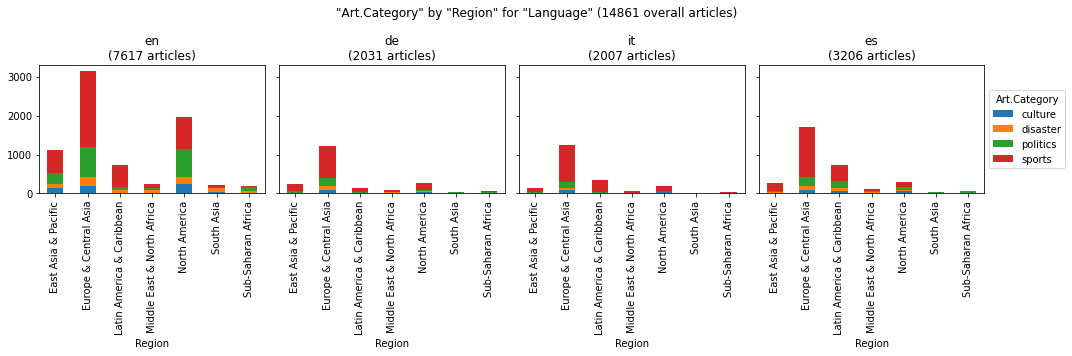

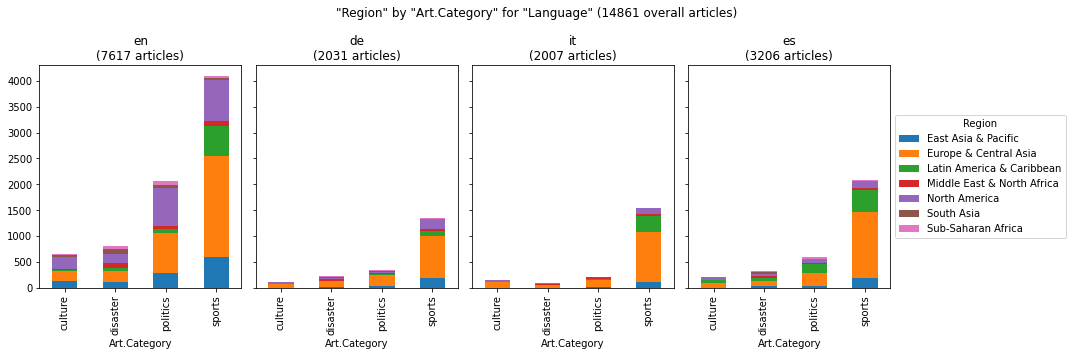

In [177]:
plot_cat_by_cat_variable(df_filtered, 'code', 'gni_region', 'cat', stacked=True, sharey=True, figsize=(15,5))
plot_cat_by_cat_variable(df_filtered, 'code', 'cat', 'gni_region' , stacked=True, sharey=True, figsize=(17,5))
plot_cat_by_cat_variable(df_filtered, 'cat', 'gni_region', 'code', stacked=True, sharey=True, figsize=(15,5))
plot_cat_by_cat_variable(df_filtered, 'gni_region', 'cat', 'code', stacked=True, sharey=True, figsize=(15,5))